In [1]:
from portfolio_perf_analysis import (
    download_stock_data,
    calculate_daily_returns,
    calculate_annualized_metrics,   
    calculate_risk_parity_weights,
    calculate_portfolio_returns,
    calculate_portfolio_metrics,
    print_portfolio_results,
    plot_cumulative_returns,
    plot_running_maximum_drawdown,
    plot_returns_histogram,
    plot_monthly_heatmap,
    plot_portfolio_vs_benchmark,
)


In [2]:
import os
import pandas as pd
import yfinance as yf

In [3]:
start_date = "2015-01-01"
end_date   = "2024-12-31"
tickers    = ["NVDA", "META", "TSLA", "JPM", "GLD", "CAT", "UNH"]
benchmark  = "QQQ"
outdir     = "notebooks/outputs"
os.makedirs(outdir, exist_ok=True)

In [4]:
prices = download_stock_data(tickers, start_date, end_date)
daily  = calculate_daily_returns(prices)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
prices

,NVDA,META,TSLA,JPM,GLD,CAT,UNH
Date,,,,,,,
2015-01-02,0.483038,77.969337,14.620667,46.720936,114.080002,69.320396,85.048477
2015-01-05,0.474880,76.717072,14.006000,45.270473,115.800003,65.661209,83.647629
2015-01-06,0.460482,75.683426,14.085333,44.096672,117.120003,65.238716,83.478859
2015-01-07,0.459282,75.683426,14.063333,44.163956,116.430000,66.249702,84.331177
2015-01-08,0.476559,77.700996,14.041333,45.150864,115.940002,66.928703,88.356598
...,...,...,...,...,...,...,...
2024-12-23,139.639572,598.452087,430.600006,233.448135,240.960007,359.954315,497.492737
2024-12-24,140.189468,606.333740,462.279999,237.286880,241.440002,362.101868,497.256958
2024-12-26,139.899521,601.943970,454.130005,238.099670,243.070007,361.658539,502.218719


In [5]:
annualised_returns, annualised_std_dev = calculate_annualized_metrics(prices)
weights = calculate_risk_parity_weights(annualised_std_dev)

In [6]:
pd.DataFrame({"weight": pd.Series(weights).sort_values(ascending=False)})

,weight
GLD,0.290321
UNH,0.156767
JPM,0.149770
CAT,0.137727
META,0.109344
NVDA,0.084345
TSLA,0.071725


In [7]:
pf_returns = calculate_portfolio_returns(daily, weights)

In [9]:
mkt_prices  = yf.download(benchmark, start_date, end_date, auto_adjust=False)["Adj Close"]
mkt_returns = mkt_prices.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [11]:
mkt_returns

Ticker,QQQ
Date,
2015-01-05,-0.014668
2015-01-06,-0.013409
2015-01-07,0.012891
2015-01-08,0.019140
2015-01-09,-0.006583
...,...
2024-12-23,0.009743
2024-12-24,0.013560
2024-12-26,-0.000679


In [12]:
metrics = calculate_portfolio_metrics(pf_returns, mkt_returns)
print_portfolio_results(metrics)

+----+-------------------+------------+
|    | Parameters        |      Value |
|----+-------------------+------------|
|  0 | Annual Returns    |  27.0862   |
|  1 | Annual Volatility |  16.8965   |
|  2 | Sharpe Ratio      |   1.30092  |
|  3 | Sortino Ratio     |   1.77811  |
|  4 | Beta              |   0.662651 |
|  5 | Treynor Ratio     |   0.331713 |
|  6 | Information Ratio |   0.407269 |
|  7 | Skewness          |  -0.427053 |
|  8 | Kurtosis          |  11.2147   |
|  9 | Maximum Drawdown  | -26.0191   |
+----+-------------------+------------+


Graphique sauvegardé: notebooks/outputs/cumulative_returns.png


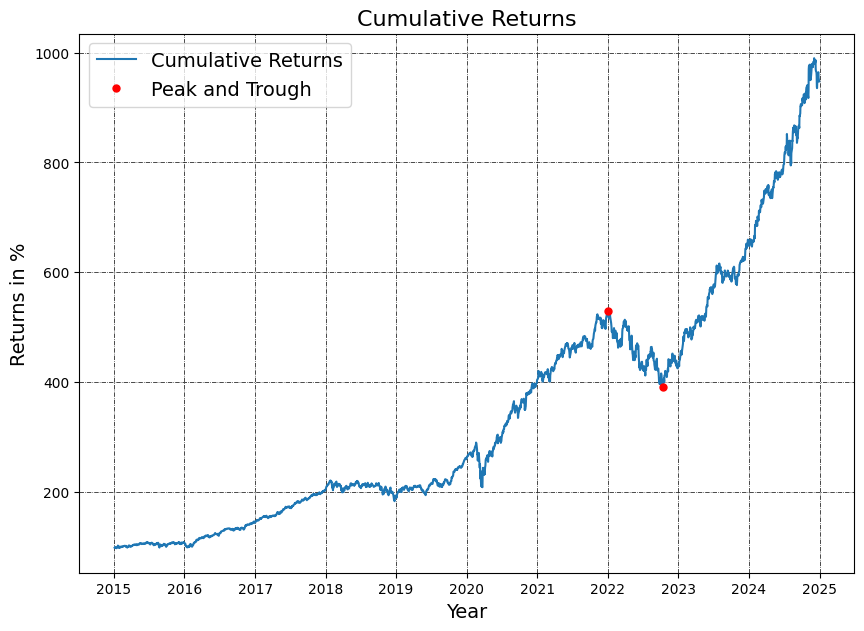

Graphique sauvegardé: notebooks/outputs/maximum_drawdown.png


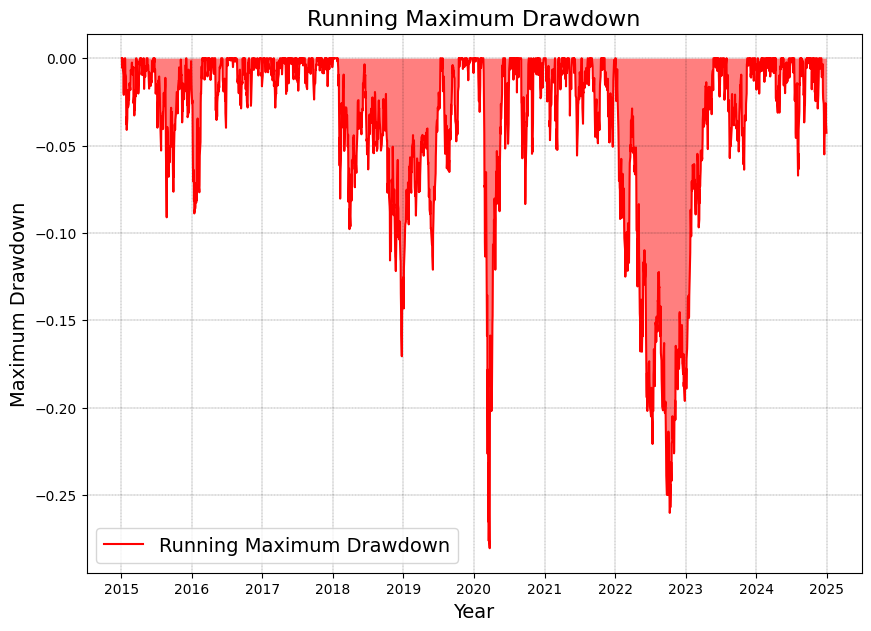

Graphique sauvegardé: notebooks/outputs/returns_histogram.png


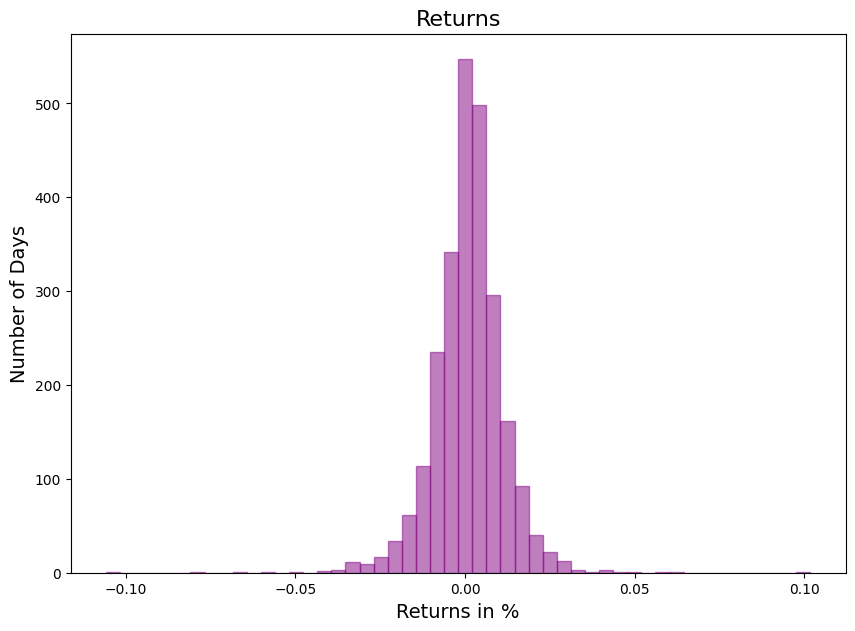

Graphique sauvegardé: notebooks/outputs/monthly_heatmap.png


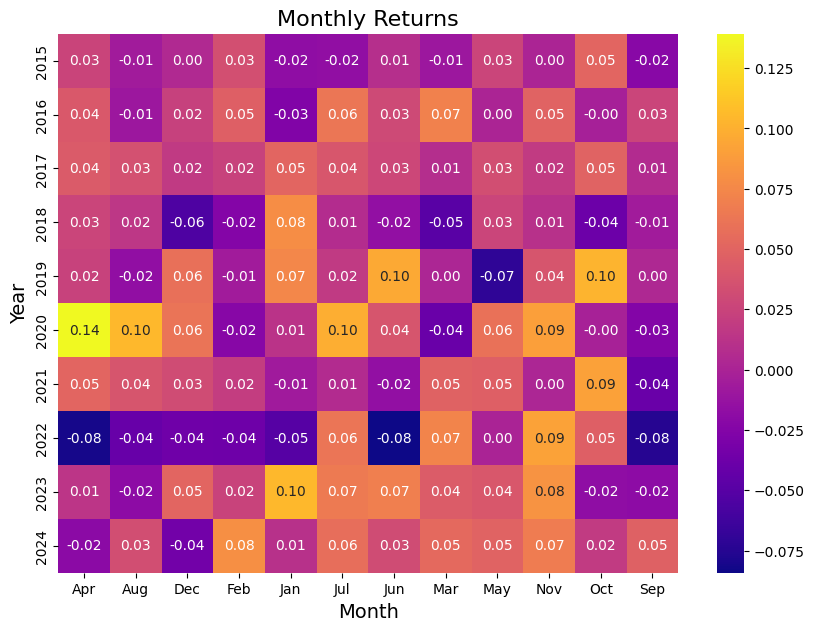

Graphique sauvegardé: notebooks/outputs/portfolio_vs_benchmark.png


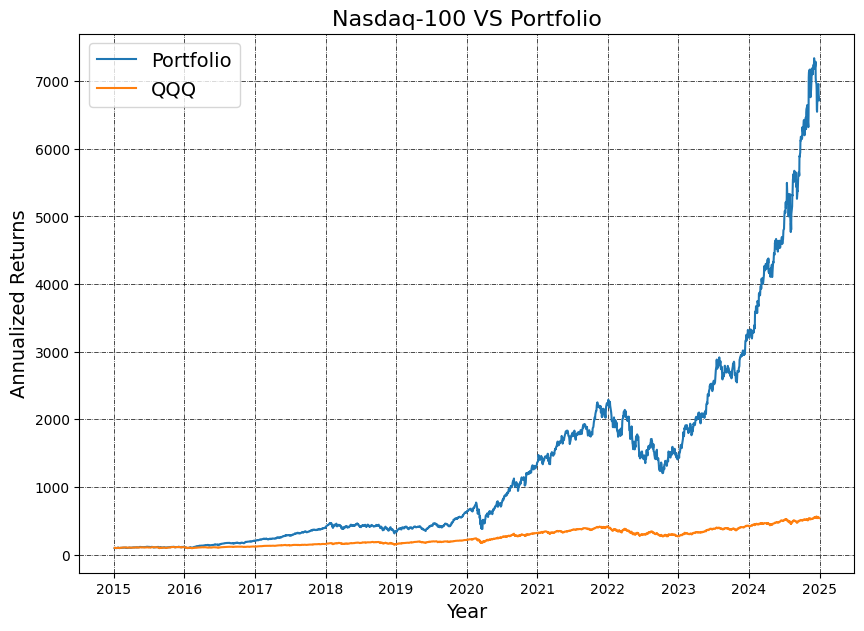

In [13]:
plot_cumulative_returns(pf_returns, save_path=f"{outdir}/cumulative_returns.png")
plot_running_maximum_drawdown(pf_returns, save_path=f"{outdir}/maximum_drawdown.png")
plot_returns_histogram(pf_returns, save_path=f"{outdir}/returns_histogram.png")
plot_monthly_heatmap(pf_returns, save_path=f"{outdir}/monthly_heatmap.png")
plot_portfolio_vs_benchmark(pf_returns, mkt_returns, leverage=2, save_path=f"{outdir}/portfolio_vs_benchmark.png")